# **CSE 435/535 Project 2 Recitation**



## Preprocessing examples
###Example 1###

**Doc id**: 38604	

**Doc text**: Management of ophthalmic perioperative period during 2019 novel coronavirus disease outbreak/ 新型冠状病毒肺炎疫情下眼科患者围手术期管理实践

**Doc tokens**: ['manag', 'ophthalm', 'periop', 'period', '2019', 'novel', 'coronaviru', 'diseas', 'outbreak']



###Example 2###
**Doc id**: 8413	

**Doc text**: "Tomar o no tomar «decisiones en caliente¼ respecto al tratamiento de la infección por SARS-CoV-2./ [Whether to make decisions ""on the fly"" regarding treatment for SARS-CoV-2 infection]"

**Doc tokens**: ['tomar', 'tomar', 'decision', 'en', 'calient', 'respecto', 'al', 'tratamiento', 'de', 'la', 'infecci', 'n', 'por', 'sar', 'cov', '2', 'whether', 'make', 'decis', 'fli', 'regard', 'treatment', 'sar', 'cov', '2', 'infect']



###Example 3###
**Doc id**: 55745	

**Doc text**: "Aufgaben und Funktion der Ständigen Arbeitsgemeinschaft der Kompetenz- und Behandlungszentren für hochkontagiöse, lebensbedrohliche Erkrankungen"

**Doc tokens**: ['aufgaben', 'und', 'funktion', 'der', 'st', 'ndigen', 'arbeitsgemeinschaft', 'der', 'kompetenz', 'und', 'behandlungszentren', 'f', 'r', 'hochkontagi', 'se', 'lebensbedrohlich', 'erkrankungen']


# Linked Lists for creating Postings lists in Python 3

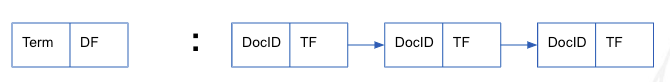

### Why bother with linked lists?

1. **Efficiency**: Faster inserts. Contigious memory not required. 
2. **Control**: Each node in the linked list can be a complex data structure. Nested linked lists.
3. **Learning**: Desired from a learning point of view, where you can get a feel of the considerations to keep in mind, and the bottlenecks while creating postings lists.

Reference:https://www.quora.com/What-is-the-purpose-of-using-a-linked-list-in-Python

### Linked List Demonstration

In [1]:
# The data structure for every element in the linked list. 
class Node:
    def __init__(self, value = None, next = None):
        self.value = value
        self.next = next

In [2]:
#The linked list
class LinkedList:

    def __init__(self):
        self.start_node = None # Head pointer
        self.end_node = None # Tail pointer

    # Method to traverse a created linked list
    def traverse_list(self):
        traversal = []
        if self.start_node is None:
            print("List has no element")
            return
        else:
            n = self.start_node
            # Start traversal from head, and go on till you reach None
            while n is not None:
                traversal.append(n.value)
                n = n.next
            return traversal

    # Method to insert elements in the linked list
    def insert_at_end(self, value):
        new_node = Node(value=value)
        n = self.start_node

        if self.start_node is None:
            self.start_node = new_node
            self.end_node = new_node
            return

        elif self.start_node.value >= value:
            self.start_node = new_node
            self.start_node.next = n
            return

        elif self.end_node.value <= value:
            self.end_node.next = new_node
            self.end_node = new_node
            return

        else:
            while n.value < value < self.end_node.value and n.next is not None:
                n = n.next

            m = self.start_node
            while m.next != n and m.next is not None:
                m = m.next
            m.next = new_node
            new_node.next = n
            return


### Linked list of integers

In [3]:
linked_list = LinkedList() #Initialize
print(linked_list)

In [4]:
#The list is empty
linked_list.traverse_list()

List has no element


In [5]:
#Insert one integer in the list
linked_list.insert_at_end(33)
linked_list.traverse_list()

[33]

In [6]:
#Note how start_node & end_node have same memory location
linked_list.start_node, linked_list.end_node

(<__main__.Node at 0x7f1eb9f50710>, <__main__.Node at 0x7f1eb9f50710>)

In [7]:
#Let's insert a few more elements
[linked_list.insert_at_end(i) for i in [42, 111, 13, 29, 7, -11]]

[None, None, None, None, None, None]

In [8]:
#Already sorted!
linked_list.traverse_list()

[-11, 7, 13, 29, 33, 42, 111]

In [9]:
#Note how start_node & end_node refer to different locations now
linked_list.start_node, linked_list.end_node

(<__main__.Node at 0x7f1eb9f646d0>, <__main__.Node at 0x7f1eb9f64550>)

### Linked list with additional data

In [10]:
class Node:
    def __init__(self, value=None, next=None, name=None, age=None):
        self.value = value
        self.next = next
        self.name = name
        self.age = age

In [11]:
from collections import OrderedDict
#The linked list
class LinkedList:

    def __init__(self):
        self.start_node = None # Head pointer
        self.end_node = None # Tail pointer
        self.n_students = 0

    # Method to traverse a created linked list
    def traverse_list(self):
        traversal = []
        if self.start_node is None:
            print("List has no element")
            return
        else:
            n = self.start_node
            # Start traversal from head, and go on till you reach None
            while n is not None:
                traversal.append(n.value)
                n = n.next
            return traversal
    
    # Method to traverse a created linked list
    def traverse_list_extra(self):
        traversal = []
        if self.start_node is None:
            print("List has no element")
            return
        else:
            n = self.start_node
            # Start traversal from head, and go on till you reach None
            cnt = 1
            while n is not None:
                node_val = OrderedDict({"id":n.value, 
                                        "name":n.name, 
                                        "age":n.age})
                traversal.append(str(node_val)+"\n"+"\t"*cnt)
                cnt += 1
                n = n.next
            return "->".join(traversal)

    # Method to insert elements in the linked list
    def insert_at_end(self, params):
        value, name, age = params
        new_node = Node(value=value, name=name, age=age)
        self.n_students += 1
        n = self.start_node

        if self.start_node is None:
            self.start_node = new_node
            self.end_node = new_node
            return

        elif self.start_node.value >= value:
            self.start_node = new_node
            self.start_node.next = n
            return

        elif self.end_node.value <= value:
            self.end_node.next = new_node
            self.end_node = new_node
            return

        else:
            while n.value < value < self.end_node.value and n.next is not None:
                n = n.next

            m = self.start_node
            while m.next != n and m.next is not None:
                m = m.next
            m.next = new_node
            new_node.next = n
            return


In [12]:
linked_list2 = LinkedList()

#Student -> ID, name, age
student1 = [100, 'Max', 22]
student2 = [99, 'Alice', 26]
student3 = [55, 'Bob', 21]
student4 = [82, 'Kenny', 23]
student5 = [75, 'Keith', 22]

In [13]:
#Let's insert the elements
[linked_list2.insert_at_end(i) for i in [student1, student2, student3, student4, student5]]

[None, None, None, None, None]

In [14]:
#Already sorted by id
linked_list2.traverse_list()

[55, 75, 82, 99, 100]

In [15]:
linked_list2.n_students

5

In [16]:
print(linked_list2.traverse_list_extra())

OrderedDict([('id', 55), ('name', 'Bob'), ('age', 21)])
	->OrderedDict([('id', 75), ('name', 'Keith'), ('age', 22)])
		->OrderedDict([('id', 82), ('name', 'Kenny'), ('age', 23)])
			->OrderedDict([('id', 99), ('name', 'Alice'), ('age', 26)])
				->OrderedDict([('id', 100), ('name', 'Max'), ('age', 22)])
					
